Fully Connected Layer

In [0]:
import numpy as np 

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None 
        #self.gamma = np.ones((in_size, 1))
        #self.beta = np.zeros((in_size, 1))
        #self.eps_norm=1e-8
        self.cache = None
        self.gamma = None
        self.beta = None    
        #self.mu = None
        #self.var = None    

    def forward(self, X):
        self.X = X
        #self.gamma = np.sqrt(np.var(X))
        #self.beta = np.mean(X)    
        #self.mu = np.mean(X,axis=0)
        #self.var = np.var(X, axis=0)
        #X = batchnorm_forward1(X,self.mu,self.var,self.gamma,self.beta)
        X, self.cache = batchnorm_forward(X)
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        #nextgrad, dgamma, dbeta = batchnorm_backward1(nextgrad,self.X,self.mu,self.var,self.gamma,self.beta)
        nextgrad, dgamma, dbeta = batchnorm_backward(nextgrad,self.cache)
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        self.gamma = dgamma
        self.beta = dbeta
        return self.gradInput, [self.gradW, self.gradB]

In [0]:
def batchnorm_forward1(x,mu,var,gamma,beta):
  X_norm = (x - mu)/np.sqrt(var + 1e-8)
  out = gamma * X_norm + beta
  return out
  

def batchnorm_backward1(dout,x,mu,var,gamma,beta):
  X_mu = x - mu
  var_inv = 1./np.sqrt(var + 1e-8)
  dX_norm = dout * gamma
  dvar = np.sum(dX_norm * X_mu,axis=0) * -0.5 * (var + 1e-8)**(-3/2)
  dmu = np.sum(dX_norm * -var_inv ,axis=0) + dvar * 1/n_X * np.sum(-2.* X_mu, axis=0)
  dX = (dX_norm * var_inv) + (dmu / n_X) + (dvar * 2/n_X * X_mu)
  dbeta = np.sum(dout,axis=0)
  dgamma = dout * X_norm
  return dx, dgamma, dbeta 

In [0]:
def batchnorm_forward(x):
      N, D = x.shape
      gamma = np.sqrt(np.var(x))
      beta = np.mean(x)
      eps=1e-8      
      #step1: calculate mean
      mu = 1./N * np.sum(x, axis = 0)
      #step2: subtract mean vector of every trainings example  
      xmu = x - mu
      #step3: following the lower branch - calculation denominator
      sq = xmu ** 2
      #step4: calculate variance
      var = 1./N * np.sum(sq, axis = 0)
      #step5: add eps for numerical stability, then sqrt
      sqrtvar = np.sqrt(var + eps)
      #step6: invert sqrtwar
      ivar = 1./sqrtvar
      #step7: execute normalization
      xhat = xmu * ivar
      #step8: Nor the two transformation steps
      gammax = gamma * xhat
      #step9
      out = gammax + beta
      #store intermediate
      cache = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)
      return out, cache
  

def batchnorm_backward(dout, cache):

      #unfold the variables stored in cache
      xhat,gamma,xmu,ivar,sqrtvar,var,eps = cache
      #get the dimensions of the input/output
      N,D = dout.shape
      #step9
      dbeta = np.sum(dout, axis=0)
      dgammax = dout #not necessary, but more understandable
      #step8
      #dgamma = np.sum(dgammax*xhat, axis=0)
      dgamma = np.sum(np.dot(dgammax, xhat), axis=0)      
      dxhat = dgammax * gamma
      #step7
      divar = np.sum(dxhat*xmu, axis=0)
      dxmu1 = dxhat * ivar
      #step6
      dsqrtvar = -1. /(sqrtvar**2) * divar
      #step5
      dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar
      #step4
      dsq = 1. /N * np.ones((N,D)) * dvar
      #step3
      dxmu2 = 2 * xmu * dsq
      #step2
      dx1 = (dxmu1 + dxmu2)
      dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)
      #step1
      dx2 = 1. /N * np.ones((N,D)) * dmu
      #step0
      dx = dx1 + dx2
      return dx, dgamma, dbeta 

In [0]:
class Batchnorm():

    def __init__(self,):
        self.gamma = np.ones((in_size, 1))
        self.beta = np.zeros((in_size, 1))
        self.eps_norm=1e-8
        self.cache = None

    def forward(self,x):
      N, D = x.shape
      #step1: calculate mean
      mu = 1./N * np.sum(x, axis = 0)
      #step2: subtract mean vector of every trainings example  
      xmu = x - mu
      #step3: following the lower branch - calculation denominator
      sq = xmu ** 2
      #step4: calculate variance
      var = 1./N * np.sum(sq, axis = 0)
      #step5: add eps for numerical stability, then sqrt
      sqrtvar = np.sqrt(var + eps)
      #step6: invert sqrtwar
      ivar = 1./sqrtvar
      #step7: execute normalization
      xhat = xmu * ivar
      #step8: Nor the two transformation steps
      gammax = gamma * xhat
      #step9
      out = gammax + beta
      #store intermediate
      self.cache = (xhat,gamma,xmu,ivar,sqrtvar,var,eps)
      return out, cache

    def backward(self,dout):
      #unfold the variables stored in cache
      xhat,gamma,xmu,ivar,sqrtvar,var,eps = self.cache
      #get the dimensions of the input/output
      N,D = dout.shape
      #step9
      dbeta = np.sum(dout, axis=0)
      dgammax = dout #not necessary, but more understandable
      #step8
      dgamma = np.sum(dgammax*xhat, axis=0)
      dxhat = dgammax * gamma
      #step7
      divar = np.sum(dxhat*xmu, axis=0)
      dxmu1 = dxhat * ivar
      #step6
      dsqrtvar = -1. /(sqrtvar**2) * divar
      #step5
      dvar = 0.5 * 1. /np.sqrt(var+eps) * dsqrtvar
      #step4
      dsq = 1. /N * np.ones((N,D)) * dvar
      #step3
      dxmu2 = 2 * xmu * dsq
      #step2
      dx1 = (dxmu1 + dxmu2)
      dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)
      #step1
      dx2 = 1. /N * np.ones((N,D)) * dmu
      #step0
      dx = dx1 + dx2
      return dx, dgamma, dbeta

Activation Layer (ReLU)

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

softmax function

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

Cross Entropy Loss

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

Loading the dataset

In [19]:
# mount your drive to use the files on your notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import h5py
from keras.datasets import mnist
from keras.utils import np_utils

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
# Close this file
h5f.close()

# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
print (X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1024)
print (X_test.shape)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

X_val = X_test
y_val = y_test

print (y_train.shape)
print (y_test.shape)


(42000, 1024)
(18000, 1024)
(42000,)
(18000,)


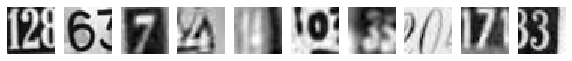

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [21]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [0]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        #out = self.forward(X)
        #loss = self.loss_func.forward(out,y)
        #nextgrad = self.loss_func.backward(out,y)
        #grads = self.backward(nextgrad)
        #return loss, grads
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)  + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.loss_func.backward(out,y) + ((Lambda/y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

update function (SGD with momentum)

In [0]:
def update_params(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] - learning_rate * g[i]
            p[i] += v[i]

minibatches (both the datapoint and the corresponding label)

In [0]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

In [0]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9, X_val=None, y_val=None, Lambda=0):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update_params(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = np.array([], dtype="int64")
        y_val_pred = np.array([], dtype="int64")
        y_train1 = []
        y_vall = []
        for i in range(0, m_train, minibatch_size):
            X_tr = X_train[i:i + minibatch_size, : ]
            y_tr = y_train[i:i + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for i in range(0, m_val, minibatch_size):
            X_va = X_val[i:i + minibatch_size, : ]
            y_va = y_val[i:i + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)

        mean_train_loss = sum(loss_batch) / float(len(loss_batch))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        val_loss_epoch.append(mean_val_loss)
        print("Loss = {0} | Training Accuracy = {1} | Val Loss = {2} | Val Accuracy = {3}".format(mean_train_loss, train_acc, mean_val_loss, val_acc))
    return net, val_acc

In [0]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

In [27]:
print (X_train.shape[1])

1024


In [0]:
from random import shuffle

## input size
input_dim = X_train.shape[1]

## hyperparameters
#iterations = 10
#learning_rate = 1e4
#learning_rate = 0.1
#hidden_nodes = 32
#output_nodes = 10

## define neural net
#nn = NN()
#nn.add_layer(Linear(input_dim, hidden_nodes))
#nn.add_layer(ReLU())
#nn.add_layer(Linear(hidden_nodes, output_nodes))

#nn = train(nn, X_train , y_train, minibatch_size=200, epoch=10, \
 #          learning_rate=learning_rate, X_val=X_val, y_val=y_val)


def train_and_test_loop(iterations, lr, Lambda):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 32
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(hidden_nodes, output_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=200, epoch=iterations, learning_rate=learning_rate,\
                      X_val=X_val, y_val=y_val, Lambda=Lambda)
    return val_acc

In [34]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Loss = 2.3026079139590223 | Training Accuracy = 0.09973809523809524 | Val Loss = 2.3027168487501597 | Val Accuracy = 0.10061111111111111


0.10061111111111111

In [35]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

Loss = 3.7407743935257066e+23 | Training Accuracy = 0.09966666666666667 | Val Loss = 4.333849703130508e+23 | Val Accuracy = 0.10077777777777777


0.10077777777777777

In [37]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(100, lr, Lambda)

Loss = 2.3025648708843995 | Training Accuracy = 0.10916666666666666 | Val Loss = 2.3023816158378163 | Val Accuracy = 0.10922222222222222
Loss = 2.302564865829785 | Training Accuracy = 0.10916666666666666 | Val Loss = 2.3023816067897083 | Val Accuracy = 0.10927777777777778
Loss = 2.302564860774827 | Training Accuracy = 0.10916666666666666 | Val Loss = 2.3023815977280457 | Val Accuracy = 0.10927777777777778
Loss = 2.3025648557188916 | Training Accuracy = 0.10916666666666666 | Val Loss = 2.3023815886633945 | Val Accuracy = 0.10927777777777778
Loss = 2.3025648506600067 | Training Accuracy = 0.10914285714285714 | Val Loss = 2.30238157962983 | Val Accuracy = 0.10933333333333334
Loss = 2.302564845597162 | Training Accuracy = 0.10914285714285714 | Val Loss = 2.302381570596103 | Val Accuracy = 0.10938888888888888
Loss = 2.3025648405341497 | Training Accuracy = 0.10916666666666666 | Val Loss = 2.3023815615619934 | Val Accuracy = 0.10938888888888888
Loss = 2.3025648354729595 | Training Accuracy =

0.10866666666666666

In [38]:
lr = 1e6
Lambda = 1e-7
train_and_test_loop(100, lr, Lambda)

Loss = 1.6584360070330646e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.10077777777777777
Loss = 1.811431607819288e+89 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8114316078192855e+89 | Val Accuracy = 0.100777777

0.10077777777777777

In [39]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(50, lr, Lambda)

Loss = 1.5107616570515062e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.10077777777777777
Loss = 1.8633505310350716e+70 | Training Accuracy = 0.09966666666666667 | Val Loss = 1.8633505310350777e+70 | Val Accuracy = 0.100

0.10077777777777777